# Cardio Vascular Dataset - Data Analysis Project

The dataset that will be analyzed is a cardio vascular dataset with 1000 rows, each representing a different patient and 14 features about that patient.  The dataset is from [Kaggle](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset/data) but the data originates from a hospital in India. The goal of this project is to do exploratory data analysis and visualization of the data and to ask and answer several questions about the data set.  The data will be imported from Kaggle, saved as a Pandas data frame, and various libraries will be utilized to accomplish the data analysis.  The project is being completed as part of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com).

## Step 0: Prerequisite Installs

Before running this project you must have the following installed:
- Python
- Pandas
- Numpy

## Step 1: Preliminaries

- Import required libraries
- Set defaults for visualizations
- Download the dataset and review the files included with the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
dataset_url = 'https://www.kaggle.com/jocelyndumlao/cardiovascular-disease-dataset' 

In [4]:
!pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./cardiovascular-disease-dataset" (use force=True to force download)


In [6]:
data_dir = './cardiovascular-disease-dataset/Cardiovascular_Disease_Dataset'

In [7]:
import os
os.listdir(data_dir)

['Cardiovascular_Disease_Dataset.csv',
 'Cardiovascular_Disease_Dataset_Description.pdf']

## Step 2: Data Preparation and Cleaning

- Load the dataset into a data frame using Pandas
- Explore the number of rows & columns, ranges of values etc.
- Check for missing, incorrect and invalid data, remove or modify the data accordingly
- Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)



In [8]:
file_name = os.listdir(data_dir)[0]

In [9]:
cv_df = pd.read_csv(f"{data_dir}/{file_name}")

In [10]:
# The dataframe has 1000 rows and 14 columns

cv_df.shape

(1000, 14)

In [11]:
# Taking a look at some basic stats on the columns

cv_df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [12]:
# Taking a sample of 20 rows to view some of the data, data looks clean, 
# without a bunch of blank values or NAs

cv_df.sample(20)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
652,6680365,60,1,1,196,179,0,0,190,0,5.4,3,3,1
301,2965235,71,0,0,187,488,1,2,139,1,1.4,2,0,1
111,1225852,76,1,0,125,146,0,1,166,0,4.4,1,0,0
190,1921320,72,1,2,180,547,1,0,146,0,5.2,2,1,1
342,3378132,44,1,3,197,282,0,2,202,0,5.2,3,3,1
594,6040211,63,1,2,161,334,1,2,148,0,5.7,2,1,1
394,3884097,78,1,1,105,267,0,0,164,0,0.3,0,1,0
336,3328780,33,1,0,195,345,0,0,194,1,3.9,1,1,0
705,7217573,22,1,2,186,334,1,1,167,1,4.1,2,3,1
320,3142651,39,1,2,156,602,1,1,145,0,3.4,2,1,1


In [13]:
# Removing patientid, this is not needed for the analysis

cv_df = cv_df.drop(columns=['patientid'])

In [14]:
# Taking a look at the unique values of target, the column that indicates if the patient
# has cardio vascular disease or not (1 = they have CV disease, 0 = do not have CV disease)

cv_df.target.unique()

array([1, 0])

In [15]:
# Age values range from a low of 20 to a high of 80 with a mean of around 49

cv_df.age.describe()

count    1000.00000
mean       49.24200
std        17.86473
min        20.00000
25%        34.00000
50%        49.00000
75%        64.25000
max        80.00000
Name: age, dtype: float64

In [16]:
# The column `serumcholestrol` is misspelled, updating the spelling

cv_df.rename(columns={"serumcholestrol": "serumcholesterol"}, inplace=True)

In [17]:
# It appears that there are serum cholesterol values of 0 which are most likely not valid.

cv_df[cv_df['serumcholesterol'] == 0].shape

(53, 13)

Removing rows with invalid serum cholesterol levels

In [18]:
cv_df = cv_df[cv_df['serumcholesterol'] > 0]

In [19]:
cv_df.shape

(947, 13)

In [20]:
# The column `exerciseangia` is misspelled, updating the spelling

cv_df.rename(columns={"exerciseangia": "exerciseangina"}, inplace=True)

In [21]:
# Change slope 0 values to NaNs because 0 means that the test wasn't performed

cv_df.slope.replace(0, np.nan, inplace=True)

Need to check for blank values across the whole dataset

In [22]:
cv_df.isnull().sum()

age                    0
gender                 0
chestpain              0
restingBP              0
serumcholesterol       0
fastingbloodsugar      0
restingrelectro        0
maxheartrate           0
exerciseangina         0
oldpeak                0
slope                180
noofmajorvessels       0
target                 0
dtype: int64

Removing rows which have invalid slope values

In [23]:
cv_df = cv_df[~cv_df.slope.isna()]

In [24]:
# Check for duplicates

cv_df.duplicated().value_counts()

False    767
Name: count, dtype: int64

## Step 3: Perform Exploratory Data Analysis & Visualization

### Review the histograms for each numeric predictor

In [25]:
list(cv_df.columns)

['age',
 'gender',
 'chestpain',
 'restingBP',
 'serumcholesterol',
 'fastingbloodsugar',
 'restingrelectro',
 'maxheartrate',
 'exerciseangina',
 'oldpeak',
 'slope',
 'noofmajorvessels',
 'target']

In [26]:
cv_df.dtypes

age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholesterol       int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangina         int64
oldpeak              float64
slope                float64
noofmajorvessels       int64
target                 int64
dtype: object

#### Number of Major Vessels
Is `noofmajorvessels` ordinal (meaning the values can be ordered and therefore should be kept numeric) or should it be nominal (values cannot be ordered and therefore should be categorical)?  I'm assuming this variable is a count of the number of blood vessels which show some sort of blockage so an ordinal relationship would intuitively make sense.  In the absence of more information about this particular data field let's check to see if the percentage of CVD increases as the `noofmajorvessels` increases...

In [27]:
nov = cv_df.groupby(['noofmajorvessels', 'target'], as_index=False).size()

In [28]:
vessel_cnts = dict(cv_df['noofmajorvessels'].value_counts())

In [29]:
vessel_cnts

{1: 263, 2: 243, 0: 155, 3: 106}

In [30]:
nov['total_counts'] = nov['noofmajorvessels'].map(vessel_cnts)
nov['percentage'] = ((nov['size'] / nov['total_counts']) * 100).round(2)

In [31]:
nov_cvd = nov[nov['target'] == 1]

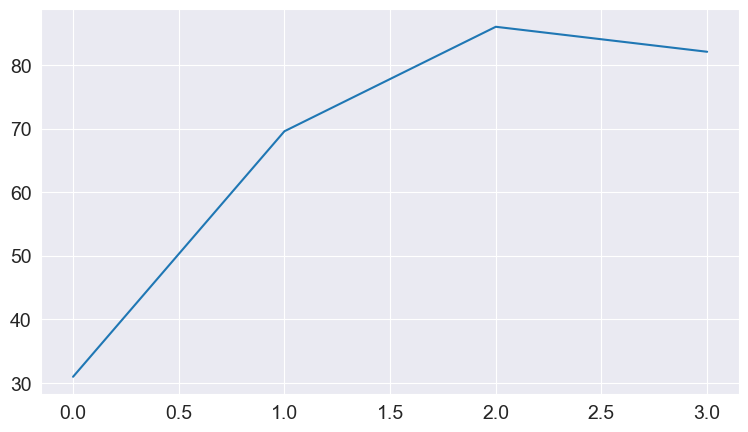

In [32]:
plt.plot(nov_cvd['noofmajorvessels'], nov_cvd['percentage'])

In [33]:
nov_cvd

,noofmajorvessels,target,size,total_counts,percentage
1,0,1,48,155,30.97
3,1,1,183,263,69.58
5,2,1,209,243,86.01
7,3,1,87,106,82.08


We see an upward trend here until we get to 3 at which point the percentage with CVD is less than 2.  However the percentages aren't too dissimilar (86% and 82%).  And intuitively we would guess that as the number of major vessels with issues increases that the CVD risk would be higher.  Therefore I'm going to consider this an ordinal variable and leave it as numeric.

#### Chest Pain
The next question is whether `chestpain` can be included in the numeric variable list or should be considered categorical.   

Values for chest pain are:
* 0: typical angina
* 1: atypical angina (chest pain that doesn't meet the criteria for angina)
* 2: non-anginal pain (pain a person may feel behind the breast bone, may feel similar to angina but was not classified as such)
* 3: asymptomatic

[Angina pain](https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373) is often described as squeezing, pressure, heaviness, tightness or pain in the chest. 

It appears that the severity of chest pain is increasing as we decrease from 3 down to 0.  Asymptomatic is of course the best value and typical angina is what we would associate with CVD.  The decision is that `chestpain` will be included as a numeric variable.  All of our variables are numeric.

In [34]:
cv_df['chestpain'].value_counts()

chestpain
2    285
0    271
1    171
3     40
Name: count, dtype: int64

/var/folders/d2/lbwvqg8j18g_xgl468r_5czh0000gn/T/ipykernel_52808/2981879266.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  cv_df.hist(bins=100, ax=ax, layout=(5, 3))


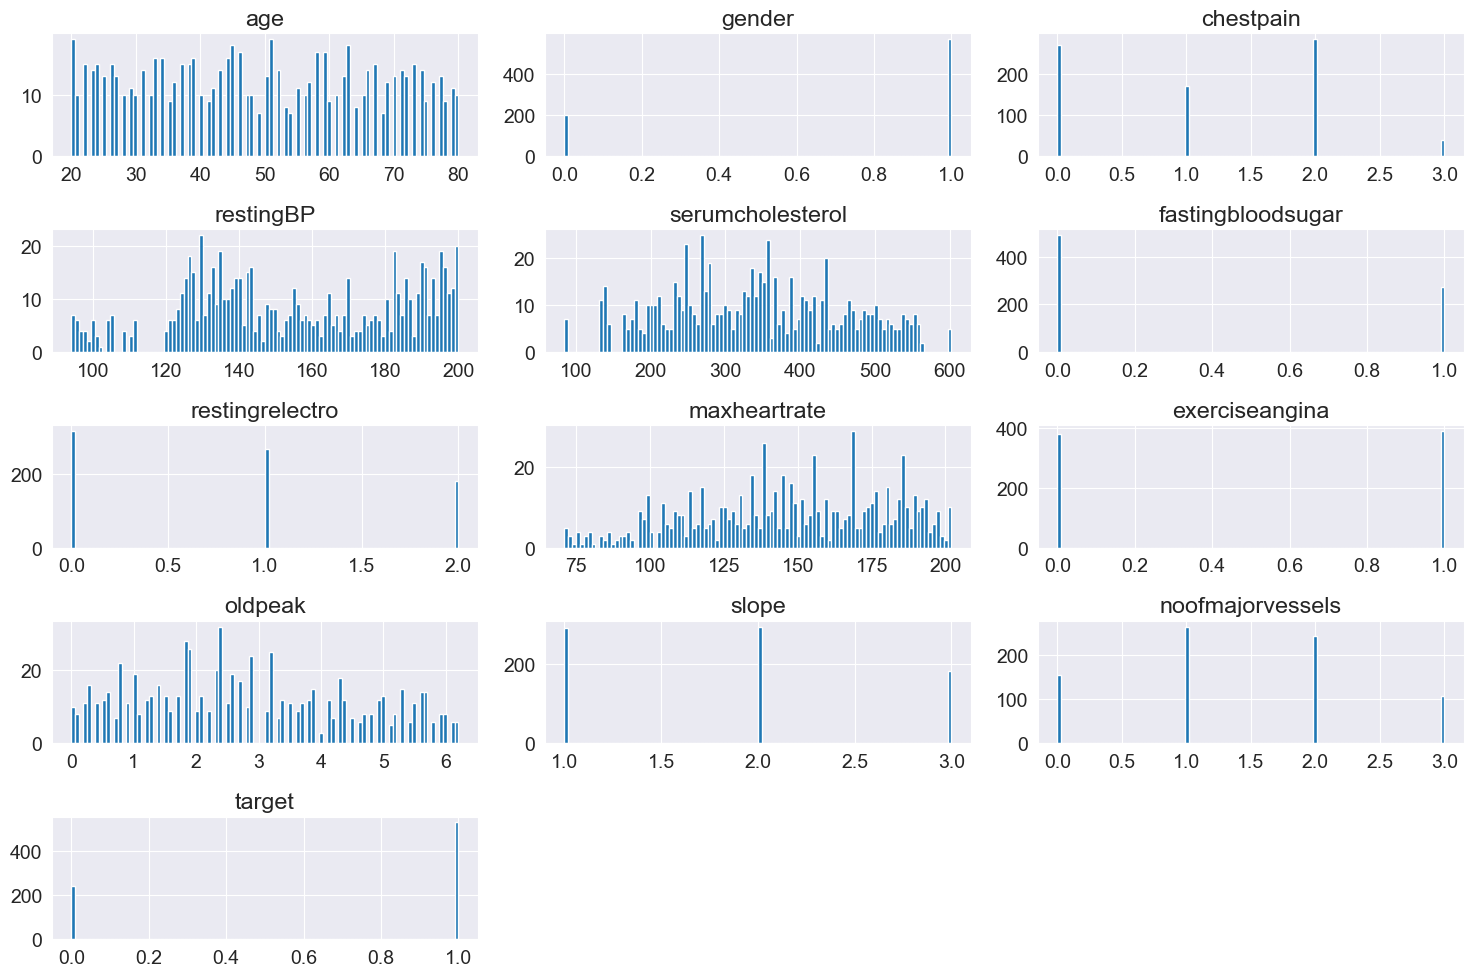

In [35]:
# Taking a look at the histograms for each of the fields

fig = plt.figure(figsize=(15,10))
ax = plt.gca()
cv_df.hist(bins=100, ax=ax, layout=(5, 3))
plt.tight_layout()
plt.show()

### Review the pair-wise correlation coefficients for all predictors and the target

Some interesting things to point out in the below pair-wise correlation matrix:
1. We see a high correlation between the `slope` and the `target`, almost 0.7.  Slope values are:
* 1-upsloping (normal)
* 2-flat (Flat T-waves are a relatively common finding in the general population, but they are often a sign of underlying cardiac disease)
* 3-downsloping (Exercise-induced downsloping ST-segment depression is a common manifestation of severe myocardial ischemia)

The slope refers to the ST segment depression which is a metric that is measured during an exercise tolerance test, [source](https://litfl.com/st-segment-ecg-library/).

2. We see several several other moderately high correlations between the `target` and other predictor variables:
* `chestpain`: 0.52
* `restingBP`: 0.44  This is the first number in a blood pressure reading, the systolic number.  A value of 130 and above is considered high.
* `restingelectro`: 0.38  This is a measure of heart activity at rest.  A value of 0 is normal, a value of 1 means that there is some abnormality, and a value of 2 means that there is probable or definite left ventricular hypertrophy (a thickening of the wall of the heart's main pumping chamber), [source](https://www.mayoclinic.org/diseases-conditions/left-ventricular-hypertrophy/symptoms-causes/syc-20374314#:~:text=Left%20ventricular%20hypertrophy%20is%20a,cause%20is%20high%20blood%20pressure.).
* `noofmajorvessels`: 0.38

4. We see several pair-wise moderately high correlations between non-target variables so we may only want to include one of the two variables in a machine learning model:
- `oldpeak` and `gender`: 0.36
- `chestpain` and `slope`: 0.40
- `noofmajorvessels` and `slope`: 0.38

In [36]:
corr_df = cv_df.corr('pearson')
corr_df

,age,gender,chestpain,restingBP,serumcholesterol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangina,oldpeak,slope,noofmajorvessels,target
age,1.000000,-0.034120,0.031945,0.024693,0.037384,0.082852,0.077138,-0.058090,-0.048055,-0.028030,-0.000433,0.034570,0.026738
gender,-0.034120,1.000000,0.107141,-0.032355,-0.106448,0.062233,-0.017502,0.111031,-0.035929,0.364796,0.066931,0.119451,0.109375
chestpain,0.031945,0.107141,1.000000,0.171601,0.194754,0.213596,0.234804,0.121046,-0.034487,0.051985,0.396953,0.190518,0.523455
restingBP,0.024693,-0.032355,0.171601,1.000000,0.185048,0.182096,0.166537,0.095759,-0.082424,-0.064530,0.270414,0.201740,0.438448
serumcholesterol,0.037384,-0.106448,0.194754,0.185048,1.000000,0.210411,0.142505,0.067676,0.002894,-0.054011,0.221753,0.153971,0.327884
fastingbloodsugar,0.082852,0.062233,0.213596,0.182096,0.210411,1.000000,0.109853,0.101947,0.013747,-0.015698,0.197407,0.148732,0.299314
restingrelectro,0.077138,-0.017502,0.234804,0.166537,0.142505,0.109853,1.000000,0.081110,-0.033259,0.026014,0.274196,0.150890,0.380780
maxheartrate,-0.058090,0.111031,0.121046,0.095759,0.067676,0.101947,0.081110,1.000000,0.021181,0.063094,0.211477,0.114706,0.236059
exerciseangina,-0.048055,-0.035929,-0.034487,-0.082424,0.002894,0.013747,-0.033259,0.021181,1.000000,0.012989,-0.036191,-0.024898,-0.057812
oldpeak,-0.028030,0.364796,0.051985,-0.064530,-0.054011,-0.015698,0.026014,0.063094,0.012989,1.000000,0.147242,0.024367,0.017274


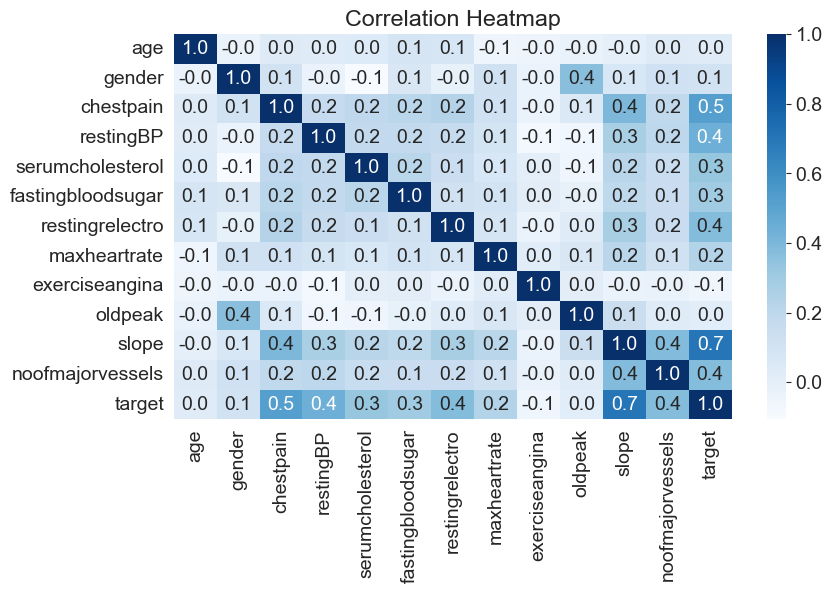

In [37]:
# Let's create a correlation heatmap to make it easier to see the data

plt.title("Correlation Heatmap")
sns.heatmap(corr_df, fmt=".1f", annot=True, cmap='Blues');

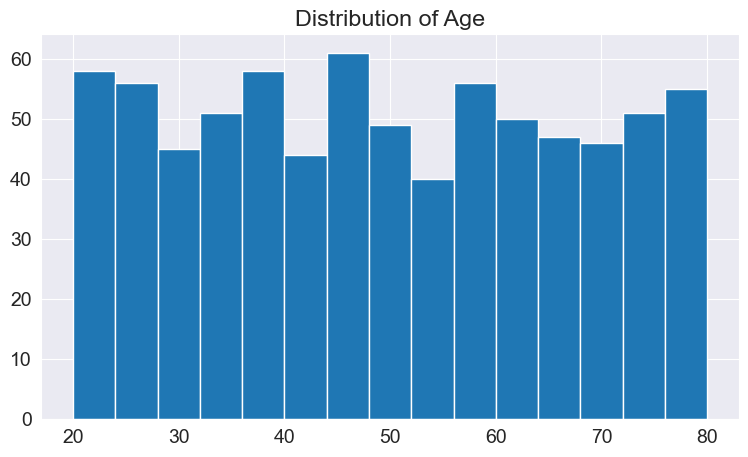

In [38]:
# We see that age follows a uniform distribution somewhat
# We don't know how the data was collected but it's possible that this was intentional,
# that groups of patients per age category were selected to be included in the dataset

plt.title("Distribution of Age")
plt.hist(cv_df.age, bins=15)
matplotlib.pyplot.show()

Resting Blood Pressure has a U shaped distribution

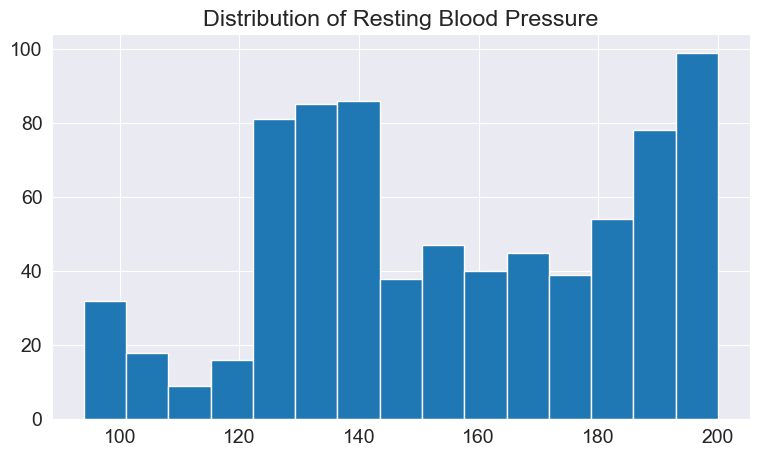

In [39]:
plt.title("Distribution of Resting Blood Pressure")
plt.hist(cv_df.restingBP, bins=15);
matplotlib.pyplot.show()

In [40]:
cv_df.restingBP.describe()

count    767.000000
mean     155.485007
std       29.021725
min       94.000000
25%      133.000000
50%      154.000000
75%      184.000000
max      200.000000
Name: restingBP, dtype: float64

Transforming the data using the log does not help to change the distribution of the data to follow a normal distribution

In [43]:
bp_logs = np.log1p(cv_df.restingBP)

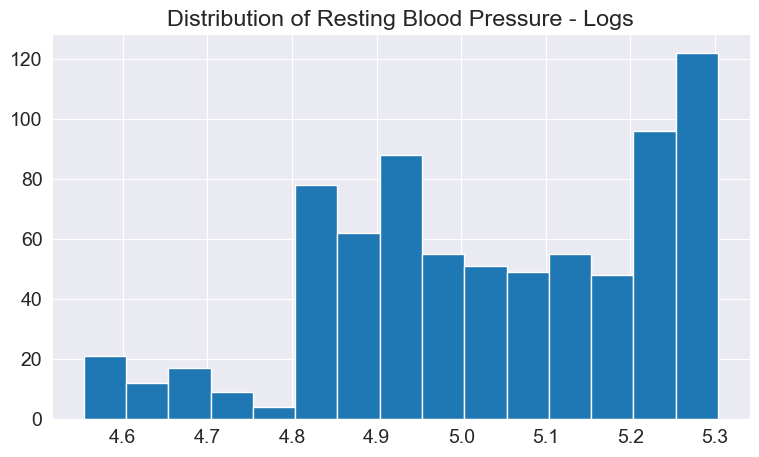

In [44]:
plt.title("Distribution of Resting Blood Pressure - Logs")
plt.hist(bp_logs, bins=15);

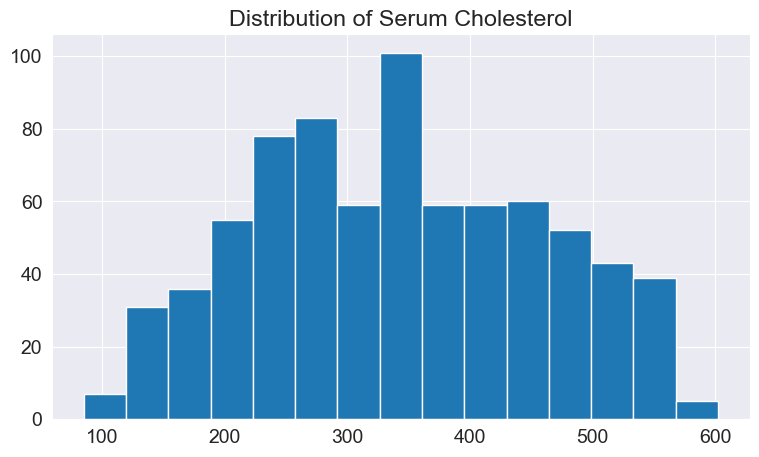

In [45]:
# The serum cholesterol data appears to follow a normal distribution more than the other variables we've explored so far

plt.title("Distribution of Serum Cholesterol")
plt.hist(cv_df.serumcholesterol, bins=15);

## Asking and Answering Questions

- Let's explore the data more by asking some questions and taking a look at the answers/observations
- Let's begin by deriving some fields so that we will be able to more easily interpret the visualizations


In [46]:
# Let's create a slopecategory column that translates the 1, 2, 3 to the more interpretable slope value (upward, flat, downward)

cv_df['slope'].value_counts()

slope
2.0    294
1.0    291
3.0    182
Name: count, dtype: int64

Adding category names for easier interpretation

In [47]:
# slopecategory

conditions = [
    (cv_df['slope'] == 1.0),
    (cv_df['slope'] == 2.0),
    (cv_df['slope'] == 3.0)
    ]

values = ['Upward', 'Flat', 'Downward']

cv_df['slopecategory'] = np.select(conditions, values)

In [48]:
cv_df['slopecategory'].value_counts()

slopecategory
Flat        294
Upward      291
Downward    182
Name: count, dtype: int64

In [49]:
# Adding cvdiseasecategory, diabetescategory, and gendercategory columns

cv_df['cvdiseasecategory'] = np.where(cv_df['target'] == 1, 'CV Disease', 'No CV Disease')
cv_df['diabetescategory'] = np.where(cv_df['fastingbloodsugar'] == 1, 'Diabetes', 'No Diabetes')
cv_df['gendercategory'] = np.where(cv_df['gender'] == 1, 'Male', 'Female')

### Question 1: Does the prevalence for cardio vascular disease increase as a patient increases in age?

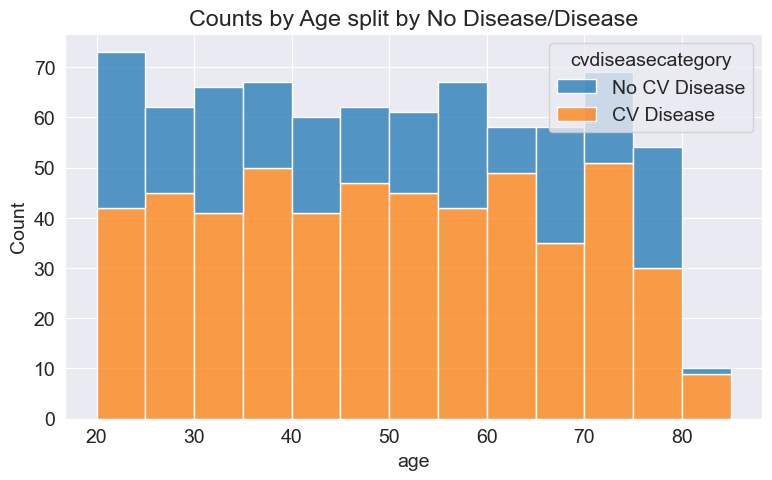

In [50]:
# Let's take a look at the counts for cardio vascular disease or no cardio vascular disease for a given age band
# Target = 0 indicates that the patient does not have cardio vascular disease
# Target = 1 indicates that the patient has cardio vascular disease
# Would be more interesting to see the percentage of cardiovascular disease out of the total count for that bin.

sns.histplot(cv_df, x='age', stat='count', bins=np.arange(20, 86, 5), hue='cvdiseasecategory', multiple='stack').set(title="Counts by Age split by No Disease/Disease")
plt.show()

In [51]:
# Creating an age range column and assigning to each patient the appropriate 10 year age range based on their age
# Someone on the edge of the range (ex: age 30) will fall into the higher level range, ex: 30-40 age range

cv_df['age_range_10'] = pd.cut(cv_df['age'], bins=range(20,91,10), right=False, labels=[f'{l}-{l+10}' for l in range(20,81,10)])

In [52]:
# A function that returns the first string character as an int:
# We will use this to order by age range

def first_string_to_int(str):
  return int(str[0])

# Create a list of all the age ranges

age_ranges = list(cv_df['age_range_10'].unique())

# Create a sorted list of the age ranges

age_ranges_sorted = age_ranges.sort(key=first_string_to_int)
age_ranges_sorted

Let's take a look at a side by side plot for each age range

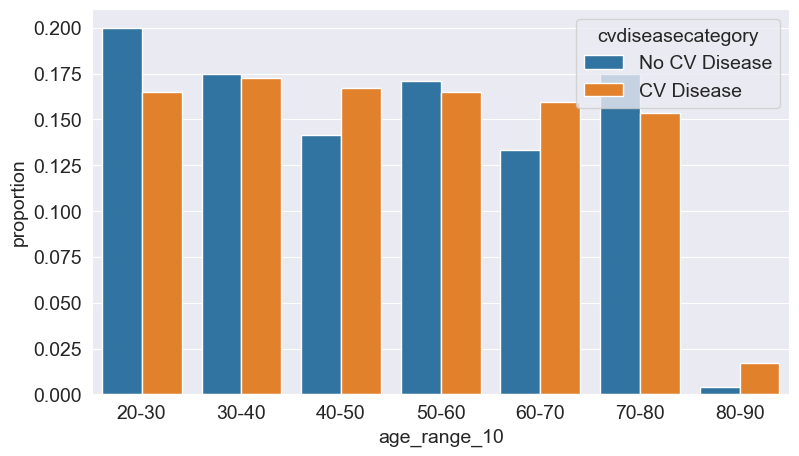

In [53]:
x, y, hue = "age_range_10", "proportion", "cvdiseasecategory"
hue_order = ['No CV Disease', 'CV Disease']
order = age_ranges_sorted

(cv_df[x]
 .groupby(cv_df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, hue_order=hue_order, order=order))
plt.show()

#### Observations:
Take note that these proportions that are plotted on the y-axis are out of the sub-group (CVD or no-CVD) as opposed to the proportion of the whole population.  So for example out of the group who do NOT have CVD, around 20% of them are in their 20s.  Another example is that out of the group who have CVD, around 17% of them are in their 30s.  

Surprisingly as we move from younger to older age groups we do not observe an upward increase in the proportion of individuals with CVD. The chart below from the NIH shows that in the real world the proportions increase quite dramatically as age increases.

<b>Prevalence of Cardiovascular disease in adults aged 20 years and older by age and sex</b>
<img src="cv_prev_by_age.png" alt="drawing" width="600"/>
<!-- ![/cv_prev_by_age.png](cv_prev_by_age.png) -->

Cardiovascular disease includes coronary heart disease, heart failure, stroke and hypertension. Source: Heart Disease and Stroke Statistics-2009 Update. From NHANES 2005-2006. Available at: www.myamericanheart.org.

#### Answer/Discussion: 
This dataset doesn't demonstrate that cardio vascular disease prevalence increases with age.  This doesn't mean that we can conclude that CVD prevalence doesn't increase with age.  In this case we need more information on how the data was collected.  Perhaps individuals were selected to be included in the dataset BECAUSE they had cardio vascular disease or didn't have cardio vascular disease so that the counts would be somewhat similar in each category instead of choosing individuals at random.

### Question 2: Do patients with a worse value for slope tend to have a higher resting blood pressure?

We saw from the correlation matrix that these two variables have a correlation coefficient of 0.27 so let's take a look at the relationship. 

Recall from the EDA about Slopes...
The slope refers to the [ST segment depression](https://litfl.com/st-segment-ecg-library/) which is a metric that is measured during an exercise tolerance test. 

The values in our `slopecategory` variable are as follows:
* upsloping (normal)
* flat (Flat T-waves are a relatively common finding in the general population, but they are often a sign of underlying cardiac disease)
* downsloping (Exercise-induced downsloping ST-segment depression is a common manifestation of severe myocardial ischemia) 

In [54]:
slope_order = ['Upward', 'Flat', 'Downward']

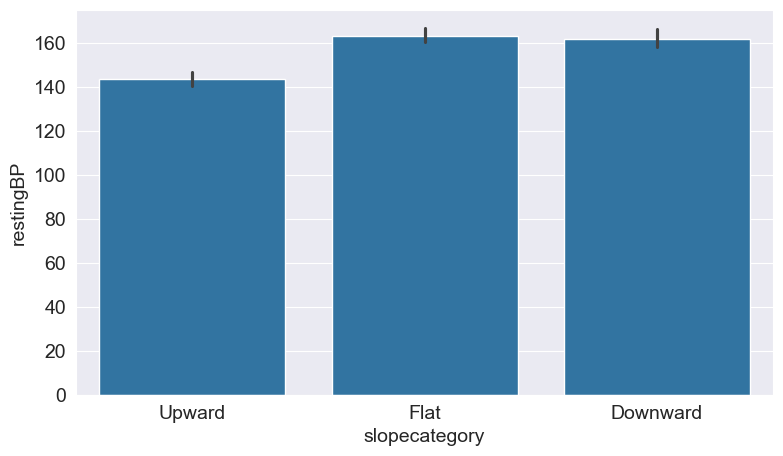

In [55]:
# To answer this question let's plot the average resting blood pressure for each slope group
# Seaborn's barplot automatically calculates the mean resting BP for each slope group 

sns.barplot(x='slopecategory', y='restingBP', data=cv_df, order = slope_order);
plt.show()

#### Observations: 
This bar plot indicates that there is a difference when moving from the best slope (Upward) to a worse slope of Flat or Downward.  We see a significant increase from Upward to Flat but no significant change from Flat to Downward.  We can see that there is a statistically significant difference between Upward and either Flat or Downward because the black confidence interval line doesn't overlap when we look at these in a pairwise fashion.  There is not a statistically significant difference between the Flat and Downward groups.

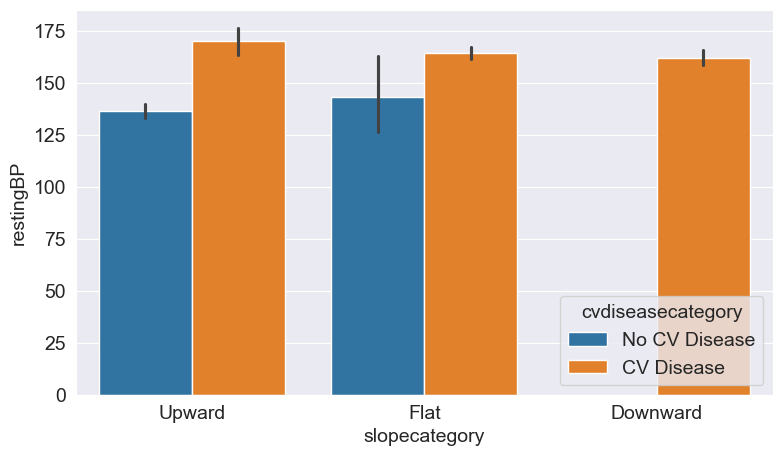

In [56]:
# Let's split the slope groups further between those that have cardio vascular disease and those that don't

sns.barplot(x='slopecategory', y='restingBP', hue='cvdiseasecategory', data=cv_df, order = slope_order);

#### Observations:
* For the upward slope group notice that there is a statistically significant difference between the CV group and the non-CV group.  The non-CV individuals have a significantly lower average resting BP than the CV individuals.

* For the flat slope group it appears that there is a fairly large confidence interval for the resting BP mean for the non-CV individuals and that it may include the mean of the CV individuals.  

* For the downward slope group all individuals have cardio vascular disease.

* Overall, we can see that for individuals with cardio vascular disease, their resting BP doesn't appear to be influenced by the slope value; their means are all around the same values regardless of slope.  Interestingly, those with CVD and a normal slope reading may actually have a slightly higher resting BP those with CVD and abnormal slope readings.

#### Answer/Discussion: 
Going back to the first visual...this dataset supports the hypothesis that individuals with an abnormal slope category (either Flat or Downward) when CVD is not considered have worse blood pressure readings on average than individuals with a normal slope category.

### Question 3: What is the relationship between number of vessels and slope?

We know from our EDA that number of vessels and slope are highly correlated with a Pearson correlation coefficient of almost 0.4.

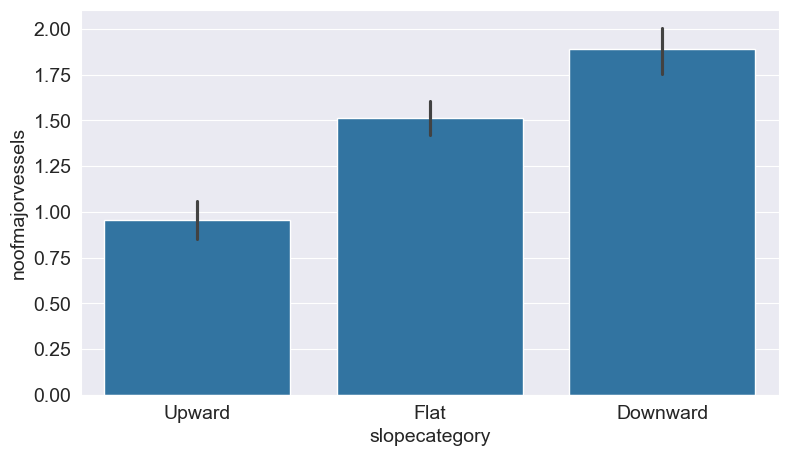

In [57]:
# To answer this question let's plot the average number of vessels for each slope group

sns.barplot(x='slopecategory', y='noofmajorvessels', data=cv_df, order = slope_order);

#### Observation:
- We see an upward trend in number of major vessels as the slopecategory becomes more abnormal (upward -> flat -> downward) and that there there is a statisically significant difference between each group.

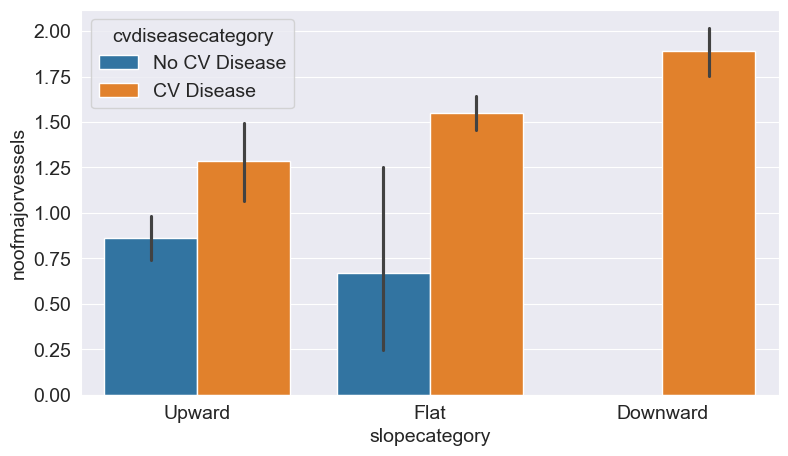

In [58]:
# Let's again split the slope groups further between those that have cardio vascular disease and those that don't

sns.barplot(x='slopecategory', y='noofmajorvessels', hue='cvdiseasecategory', data=cv_df, order = slope_order);

#### Observations:
* Here we see a significant difference in the Upward slope group between the mean of major vessels between those with cardio vascular disease and those without.  
* Similar also to the blood pressure analysis, we see a large variation in the data of those who have a Flat slope value but who don't have cardio vascular disease.  Perhaps these individuals are in the beginning stages of cardio vascular disease where some of their cardio vascular function has already been compromised (thus why some of them have much higher number of major vessels as others) and which is why their slope is less than ideal.  Surprisingly, their mean number of major vessels is lower than the non-CVD group with a normal slope.
* The downward slope group with cardio vascular disease has a significantly higher number of vessels on average than the flat and upward slope groups who also have cardio vascular disease.  These may be individuals with more advanced CVD where more major vessels are impacted and thus their slope reading has become more abnormal.

#### Answer/Discussion: 
We can see a very clear relationship between slope and number of major vessels.  As number of major vessels increases the chance of a worse slope reading becomes more likely.  Perhaps only including one of these variables in our model would be sufficient.  We would want to drop `noofmajorvessels` because `slope` is so highly correlated with `target`.

### Question 4: What is the difference in the mean fasting blood sugar level between the group with cardio vascular disease and the group without?

#### Background:
- We know that people with diabetes are at risk for developing multiple health complications, including cardiovascular disease.
- A fasting blood sugar of 99 or lower is normal, 100-125 indicates pre-diabetes, 126 or higher indicates that you have diabetes.
- In this dataset, a value of 0 for fastingbloodsugar indicates a score of less than or equal to 120 and 1 indicates a score of greater than 120 (diabetes). Unfortunately we don't have the raw data so we can't further segment those with a 0 score into pre-diabetes vs normal blood sugar.

In [60]:
# Let's first calculate the mean fasting blood sugar for these two groups

cv_df.groupby('target')[['fastingbloodsugar']].mean().round(2)

,fastingbloodsugar
target,
0,0.15
1,0.46


#### The way to interpret the above chart is the following:
* There is a 0.15 probability that a randomly selected individual from the non-cardio vascular disease group (target = 0) will have a fasting blood sugar greater than 120
* There is a 0.46 probability that a randomly selected individual from the cardio vascular disease group (target = 1) will have a fasting blood sugar greater than 120
* The probability of having a high fasting blood sugar for the cardio vascular disease group is more than 3 times that of the non-diseased group

In [61]:
# Let's look at it the other way around as well (probability of being in the cardio vascular disease group given a high fasting blood sugar):

cv_df.groupby('fastingbloodsugar')[['target']].mean().round(2)

,target
fastingbloodsugar,
0,0.58
1,0.87


#### The way to interpret the above chart is the following:
* There is a 0.58 probability that a randomly selected individual from the normal fasting blood sugar group (fastingbloodsugar = 0) will have cardio vascular disease
* There is a 0.87 probability that a randomly selected individual from the high fasting blood sugar group (fastingbloodsugar = 1) will have cardio vascular disease
* The probability of having cardio vascular disease for the high fasting blood sugar group is almost 1.5 times that of the non-diseased group

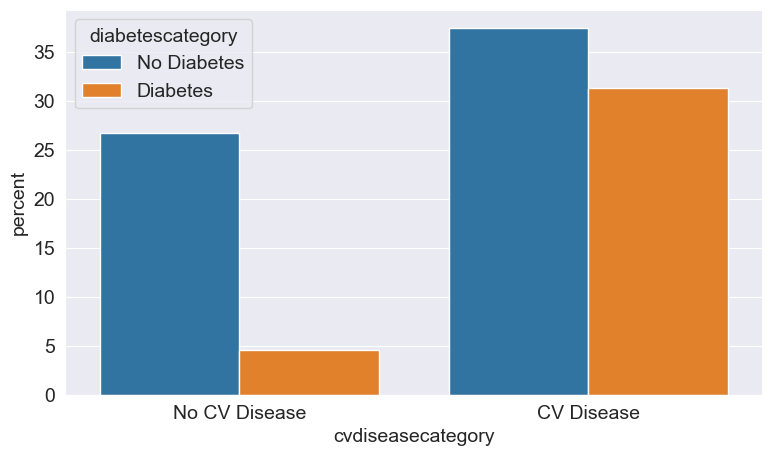

In [63]:
# Let's look at the overall percentages of 0s and 1s for fastingbloodsugar for each target group

sns.countplot(x='cvdiseasecategory', hue='diabetescategory', data=cv_df, stat='percent');

#### Observations:
- The majority of the non-cardio vascular disease group have a blood sugar under 120
- There is only a small percentage of individuals in this dataset (less than 5%) who have diabetes but don't have cardio-vascular disease
- Surprisingly, in the cardio vascular disease group there are a larger number of individuals who DO NOT have diabetes than those who have diabetes (take note though that those classified as NOT having diabetes could include individuals who are pre-diabetic)

#### Answer/Discussion:
The probability of having a high fasting blood sugar for the cardio vascular disease group is more than 3 times that of the non-diseased group.  This dataset supports the commonly known fact that diabetes is an important risk factor for cardio vascular disease.

### Q5: How does the slope value differ for the diabetic vs non-diabetic groups?

<Axes: xlabel='slopecategory', ylabel='fastingbloodsugar'>

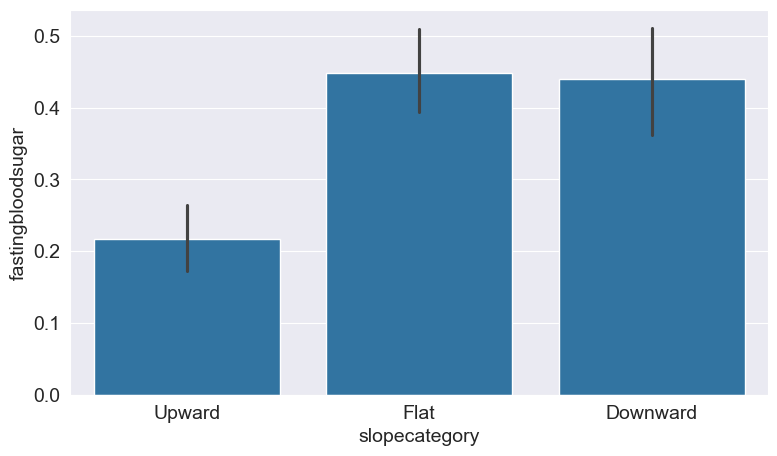

In [64]:
sns.barplot(x='slopecategory', y='fastingbloodsugar', data=cv_df, order = slope_order)

In [65]:
cv_df.groupby('slopecategory')[['fastingbloodsugar']].mean().round(2)

,fastingbloodsugar
slopecategory,
Downward,0.44
Flat,0.45
Upward,0.22


#### Observations:
* Given a good slope category (Upward) the probability of being a diabetic is 0.22
* Given an abnormal slope category (either Flat or Downward) the probability of being a diabetic is 0.45 and 0.44 respectively

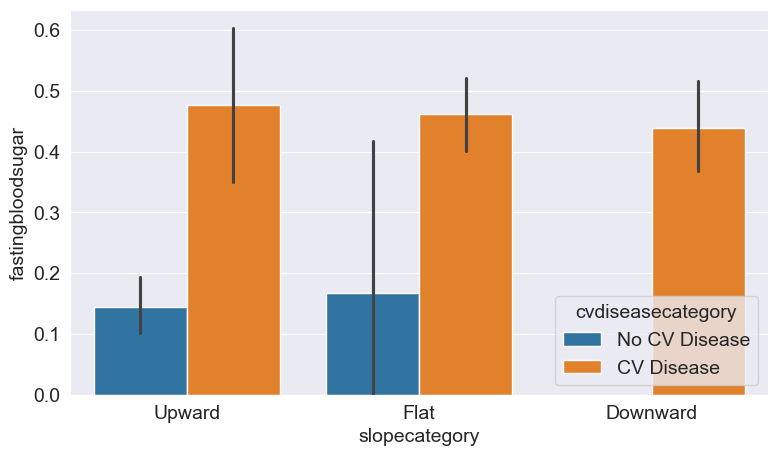

In [66]:
# Let's look at the probability of an abnormal fastingbloodsugar for each slope category group 
# broken down by CVD or no-CVD

sns.barplot(x='slopecategory', y='fastingbloodsugar', hue='cvdiseasecategory', data=cv_df, order = slope_order);

#### Observations:
Recall here that `fastingbloodsugar` only takes on a value of 0 or 1 so the values on the y-axis represent the probability that each group on the x-axis would have a fasting blood sugar greater than 120
- In the upward slope group we see a large significant difference in the probability of being a diabetic between the individuals with cardio vascular disease and those without
- In the flat slope group we see quite a large confidence interval for the probability of being a diabetic for the individuals without cardio vascular disease (no significant difference in overall probability for those who do have CVD)
- For individuals with cardio vascular disease the probability of having diabetes is very similar regardless of the slope category from their exercise test

#### Answer/Discussion:
* Given an abnormal slope score (and knowing nothing else about the individual), that individual has about a 44-45% chance of being diabetic, about double the chance of an individual with a normal slope score
* Given that an individual has cardio vascular disease, regardless of their slope score, they will still all have about a 40-50% chance of being diabetic (even if the slope score is normal).

### Q6: Is there any difference in gender within the cardio vascular disease group and the non cardio vascular disease group?

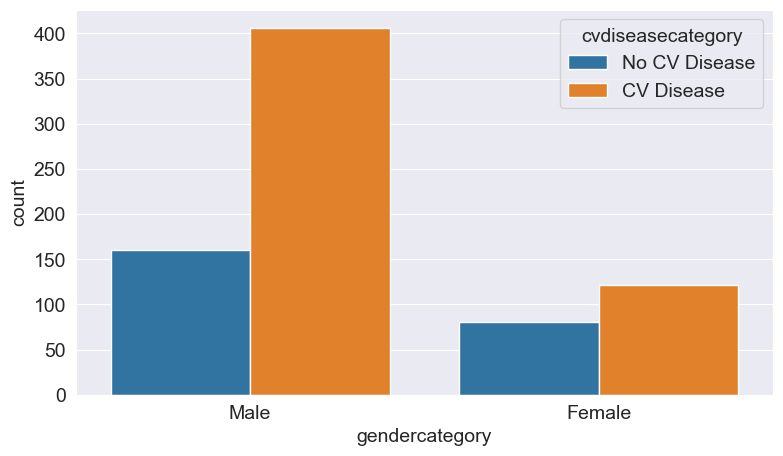

In [67]:
sns.countplot(x='gendercategory', hue='cvdiseasecategory', data=cv_df);

#### Observations:
- The female counts are much smaller than the male counts in both the cardio vascular disease and non-cardio vascular disease groups
- There are higher counts in the cardio vascular disease group than the non-cardio vascular disease group in both categories.
- It is difficult to make inferences here without knowing more about how the data was collected
- Also would be better to look at the mean values here instead of the counts since we have a large difference in overall counts between the genders so let's take a look at that next...

In [68]:
cv_df.groupby('gendercategory')[['target']].mean().round(2)

,target
gendercategory,
Female,0.60
Male,0.72


#### Answer/Discussion:
From [this article](https://pubmed.ncbi.nlm.nih.gov/36690310/#:~:text=Abstract,rate%20and%20a%20worse%20prognosis) cardio vascular disease prevalence is lower in women than men.  However, once a woman has had an acute cardiovascular event they have a greater risk for death and have a worse prognosis than men.
* We see in our dataset that the probability of falling into the cardio vascular disease group is greater for males (0.72) than for females (0.60).
* Our dataset confirms that the prevalence is higher for men than women, about 12% in this case.
* Additional understanding of how individuals were selected to be included in this dataset is needed before any conclusions can be drawn.

### Question 7: What is the relationship between chest pain and slope?

We know from our EDA that chest pain and slope are highly correlated with a Pearson correlation coefficient of almost 0.4.

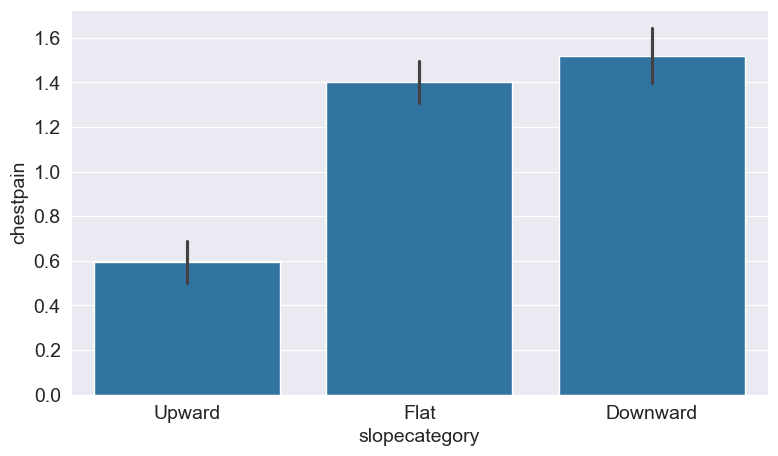

In [69]:
# Let's first plot the average chest pain value for each slope group

sns.barplot(x='slopecategory', y='chestpain', data=cv_df, order = slope_order);

#### Observation:
- We see an upward trend in chestpain values as the slopecategory becomes more abnormal (upward -> flat -> downward), though there is not a statisically significant difference between Flat and Downward groups.

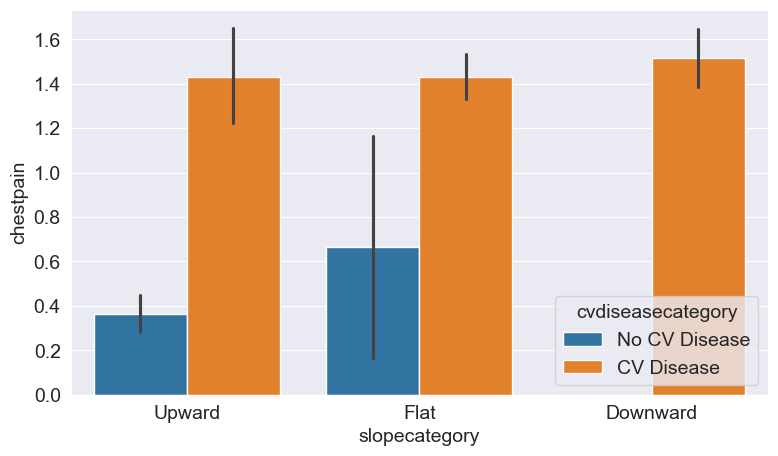

In [70]:
# Let's again split the slope groups further between those that have cardio vascular disease and those that don't

sns.barplot(x='slopecategory', y='chestpain', hue='cvdiseasecategory', data=cv_df, order = slope_order);

#### Observations:
* Similar to the blood pressure analysis, here we see a big difference in the Upward slope group in the chest pain average between those with cardio vascular disease and those without.  
* Similar also to the blood pressure analysis, we see a large variation in the data of those who have a Flat slope value but who don't have cardio vascular disease.  Some of this variation may be explained by individuals who are in the beginning stages of cardio vascular disease 
* What is very odd here is that the chest pain scores are increasing as we look at sicker groups (those with CVD and a downward slope reading for example).  Based on the data dictionary associated with this dataset, the chest pain score is reversed - angina is 0 and no angina is 3.  So we would expect the sickest group to have the lowest average for `chestpain`.  We see the opposite of this.  It is possible that the data dictionary is incorrect for this data field.

#### Answer/Discussion: 
There appears to be a discrepancy between the data dictionary and the results that we are seeing in the analysis.  Assuming that the data dictionary is incorrect and a higher chest pain score is worse than a lower score (a higher score would mean that the pain was more indicative of angina and a 0 would mean no chest pain), this dataset supports the hypothesis that individuals with an abnormal slope category (either Flat or Downward) have worse chest pain scores than individuals with a normal slope category. For those who have been diagnosed with cardio vascular disease we see similar chest pain scores regardless of the slope category. 

## Inferences and Conclusion

- Based on an analysis of this dataset we have observed that the following factors can be important predictors of cardio vascular disease:
1. The slope value that results from an exercise test
2. Chest pain
3. Resting blood pressure
4. Resting electrocardiogram results

- Though we would expect the proportion of individuals with cardio vascular disease to increase as age increases, this particular dataset did not support this idea.  We would need to understand more about how this data was collected in order to understand whether we can make any conclusions about age.
- Fasting blood sugar (as an indication of whether an individual has diabetes or not) is an important factor for cardio vascular disease, though not as good of a predictor as the four factors listed above.
- We weren't able to conclude that there was a significant difference in cardio vascular disease prevalence between men and women.



## Prediction Model

Let's train a model to predict cardiovascular disease based on this dataset...

In [71]:
cv_df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholesterol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate',
       'exerciseangina', 'oldpeak', 'slope', 'noofmajorvessels', 'target',
       'slopecategory', 'cvdiseasecategory', 'diabetescategory',
       'gendercategory', 'age_range_10'],
      dtype='object')

In [72]:
# We only want to include the original columns in our model (removing the derived columns)

cv_df_full=cv_df[['age', 'gender', 'chestpain', 'restingBP', 'serumcholesterol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangina',
       'oldpeak', 'slope', 'noofmajorvessels', 'target']]

In [73]:
cv_df_full

,age,gender,chestpain,restingBP,serumcholesterol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangina,oldpeak,slope,noofmajorvessels,target
1,40,1,0,94,229,0,1,115,0,3.7,1.0,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1.0,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2.0,2,1
6,79,1,2,130,240,0,2,157,0,2.5,2.0,1,1
7,52,1,0,127,345,0,0,192,1,4.9,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,77,0,0,183,298,1,2,142,1,2.4,3.0,3,1
995,48,1,2,139,349,0,2,183,1,5.6,2.0,2,1
996,47,1,3,143,258,1,1,98,1,5.7,1.0,0,0
997,69,1,0,156,434,1,0,196,0,1.4,3.0,1,1


In [74]:
cv_df_full.dtypes

age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholesterol       int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangina         int64
oldpeak              float64
slope                float64
noofmajorvessels       int64
target                 int64
dtype: object

Calculate the pairwise correlations between each numeric predictor and the target

In [75]:
cv_df_full.corrwith(cv_df_full.target)

age                  0.026738
gender               0.109375
chestpain            0.523455
restingBP            0.438448
serumcholesterol     0.327884
fastingbloodsugar    0.299314
restingrelectro      0.380780
maxheartrate         0.236059
exerciseangina      -0.057812
oldpeak              0.017274
slope                0.705909
noofmajorvessels     0.378056
target               1.000000
dtype: float64

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
df_full_train, df_test = train_test_split(cv_df_full, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [78]:
len(df_train), len(df_val), len(df_test)

(459, 154, 154)

In [79]:
y_full_train = df_full_train['target']
y_train = df_train['target']
y_val = df_val['target']
y_test = df_test['target']

Deleting the target column from each of the datasets

In [80]:
del df_full_train['target']
del df_train['target']
del df_val['target']
del df_test['target']

In [81]:
from sklearn.feature_extraction import DictVectorizer

In [82]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression()

In [85]:
model.fit(X_train, y_train)

/Users/lizwi/miniconda3/envs/data-analysis/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

This is not converging because we know we have a number of variables that do not follow a standard normal distribution.  We will use scaling to handle this.

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [87]:
X_train_num = df_train.values

scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train_num)

In [88]:
X_val_num = df_val.values
X_val_num = scaler.transform(X_val_num)

In [89]:
X_test_num = df_test.values
X_test_num = scaler.transform(X_test_num)

In [90]:
np.set_printoptions(suppress = True)

In [91]:
X_train = X_train_num

In [92]:
X_val = X_val_num

In [93]:
X_test = X_test_num

In [94]:
model = LogisticRegression(C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [95]:
y_pred = model.predict_proba(X_val)[:,1]

In [96]:
y_pred

array([0.99999993, 0.03681224, 0.00023817, 0.02153825, 0.99747319,
       0.16655423, 0.64711579, 0.93321618, 0.99999999, 0.99999998,
       0.99995452, 0.99999698, 0.00456314, 0.34416903, 0.99999429,
       0.99452016, 0.98840086, 0.99999742, 0.99689372, 0.99999998,
       0.99880559, 0.14458272, 0.55732879, 0.8253842 , 0.00193375,
       0.99999781, 0.03254301, 0.99996643, 0.02265846, 0.01172024,
       0.99999999, 0.99999798, 0.9999671 , 0.99999985, 0.99975373,
       0.00051582, 0.00556696, 0.99999855, 0.9928525 , 0.95369573,
       0.05579805, 0.00024906, 0.99238159, 0.67650787, 0.99999732,
       0.00903396, 0.01183371, 0.94305229, 0.99998672, 0.00092081,
       0.99604304, 0.99956916, 0.97777949, 0.99999979, 0.98977525,
       0.00406526, 0.00104058, 0.09376499, 0.99924013, 0.99918719,
       0.99999966, 0.99999796, 0.99728632, 0.16810201, 0.99999886,
       0.00128606, 0.99997951, 0.00093655, 0.01945492, 0.99516931,
       0.9994457 , 0.99311985, 0.00512326, 0.9477743 , 0.99998

If the model score is greater than 0.5 then we predict that the individual has cardio vascular disease.  If it is less than or equal to 0.5 then we predict that the individual does not have cardio vascular disease.

In [97]:
cvd_likely = (y_pred > 0.5)

We are seeing that the model is predicting 96.1% of individuals correctly in the validation dataset

In [98]:
org_accuracy = (y_val == cvd_likely).mean().round(3)
org_accuracy

0.961

### Validating the model using the full training data and the test dataset

In [99]:
y_full_train

865    1
924    0
211    1
667    0
399    0
      ..
842    0
929    1
101    0
311    1
54     1
Name: target, Length: 613, dtype: int64

In [100]:
df_full_train.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholesterol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate',
       'exerciseangina', 'oldpeak', 'slope', 'noofmajorvessels'],
      dtype='object')

In [101]:
dicts_full_train = df_full_train.to_dict(orient="records")

In [102]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [103]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

/Users/lizwi/miniconda3/envs/data-analysis/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

We need to scale the full train data...

In [104]:
X_full_train_num = df_full_train.values

scaler = StandardScaler()

X_full_train_num = scaler.fit_transform(X_full_train_num)

In [105]:
model = LogisticRegression(C=10, max_iter=1000, random_state=42)
model.fit(X_full_train_num, y_full_train)

LogisticRegression(C=10, max_iter=1000, random_state=42)

In [106]:
y_pred_test = model.predict_proba(X_test)[:,1]

In [107]:
cvd_likely_test = (y_pred_test > 0.5)

We are seeing even better accuracy when we train on a larger number of records from the dataset and then check the model on the test records (97.4% vs 96.1%).  There is a difference here but not large enough to be concerned about overfitting.

In [108]:
test_accuracy = (y_test == cvd_likely_test).mean().round(3)
test_accuracy

0.974

## Future Work

Since we found that factors like slope, chest pain, resting blood pressure, and resting electrocardiogram are highly correlated with the target variable, it would be interesting to train a simpler model with just a few of those factors included and to compare the accuracy with the larger model.  We may also want to remove `noofmajorvessels` as we know this is strongly correlated with `slope`.  We could also try fitting other types of models like random forest and gradient boosting trees and comparing to see which model was best. 